In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import shap
shap.initjs()

In [36]:
# 数据预处理函数
def load_and_preprocess(file_path):
    data = pd.read_excel(file_path)
    df = data.drop(['Formula', 'Workfunction', 'X', 'T', 'M'], axis=1)
    return df.iloc[:, :], data['Workfunction']
# 模型训练与评估函数
def train_and_evaluate(X_train, X_test, y_train, y_test, base_models, meta_model, cv=5):
    model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=cv)
    model.fit(X_train, y_train)

    explainer = shap.Explainer(model.predict,X_train)

    shap_values = explainer(X)
    
    return shap_values

In [37]:
# 加载数据
file_path = r'C:\Users\Shang\Desktop\实验二\c2db_Mxenes+10d描述符.xlsx'
X, y = load_and_preprocess(file_path)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# 定义不同的模型配置
configurations = [
    {
        'base_models': [
            ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=2)),
            ('svr', make_pipeline(StandardScaler(), SVR(C=3.0, epsilon=0.3))),
            ('extra_trees', ExtraTreesRegressor(n_estimators=94, random_state=42)),
            ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=9)))
        ],
        'meta_model': RandomForestRegressor(n_estimators=56, random_state=42)
    },
]

In [39]:
for config in configurations:
    shap_values_sta = train_and_evaluate(X_train, X_test, y_train, y_test, config['base_models'], config['meta_model'], cv=5)

PermutationExplainer explainer: 276it [05:23,  1.20s/it]                                                               


In [40]:
shap.initjs()

In [41]:

gb_r = GradientBoostingRegressor(n_estimators=165, random_state=42)
gb_r.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=165, random_state=42)

In [42]:
explainer_gb = shap.Explainer(gb_r,X_train)
shap_values_gb = explainer_gb(X)

In [43]:
shap.initjs()

In [44]:
svr = make_pipeline(StandardScaler(), SVR(C=3.0, epsilon=0.3))
svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=3.0, epsilon=0.3))])

In [45]:
explainer_svr = shap.Explainer(svr.predict,X_train)
shap_values_svr = explainer_svr(X)

PermutationExplainer explainer: 276it [01:18,  3.01it/s]                                                               


In [46]:
shap.initjs()

In [47]:
et_r = ExtraTreesRegressor(n_estimators=94, random_state=42)
et_r.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=94, random_state=42)

In [48]:
explainer_et = shap.Explainer(et_r,X_train)
shap_values_et = explainer_et(X)

In [49]:
shap.initjs()

In [50]:
knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=9))
knn.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=9))])

In [51]:
explainer_knn = shap.Explainer(knn.predict,X_train)
shap_values_knn = explainer_knn(X)

PermutationExplainer explainer: 276it [00:16,  6.39it/s]                                                               


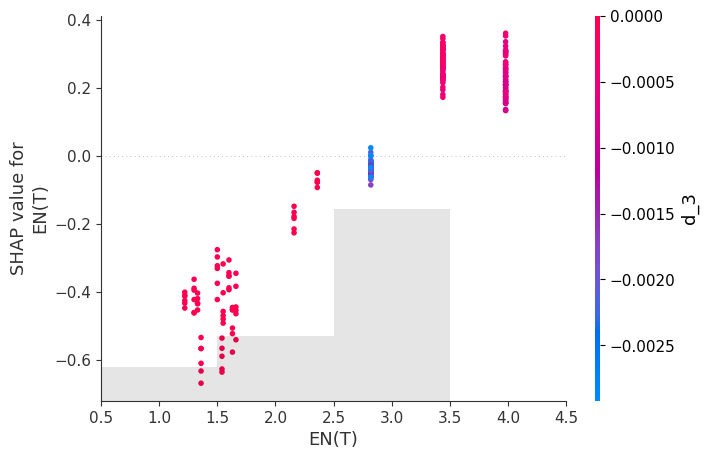

In [66]:
shap.plots.scatter(shap_values_sta[:,'EN(T)'],color = shap_values_sta[:,'d_3'])

In [52]:
shap_list = [shap_values_sta,shap_values_gb,shap_values_et,shap_values_knn,shap_values_svr]

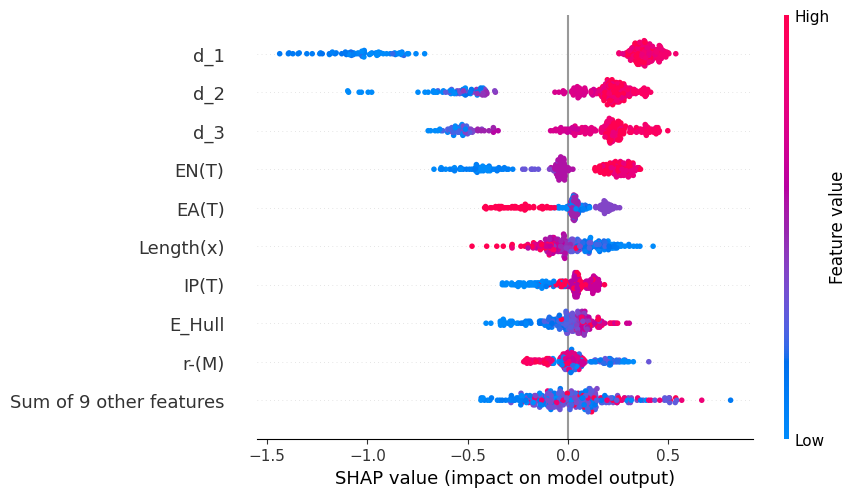

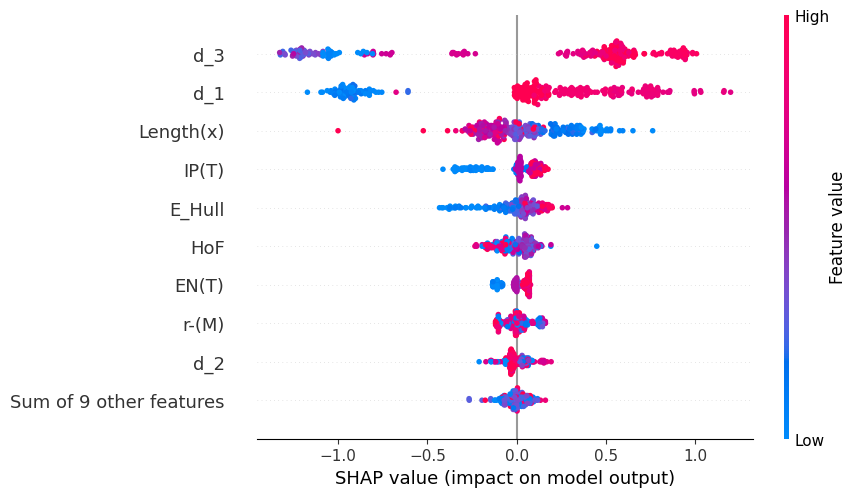

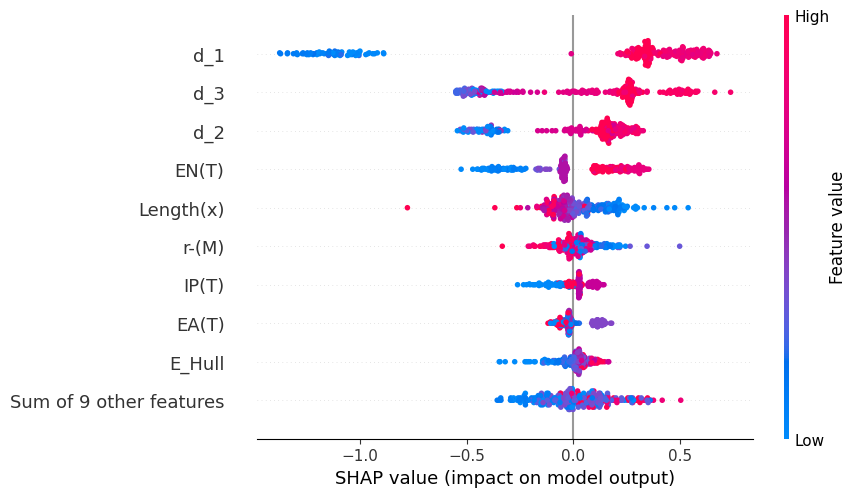

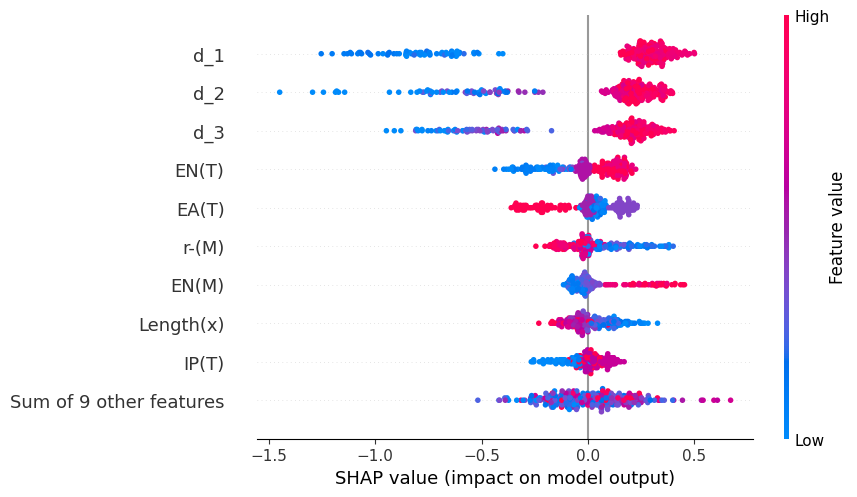

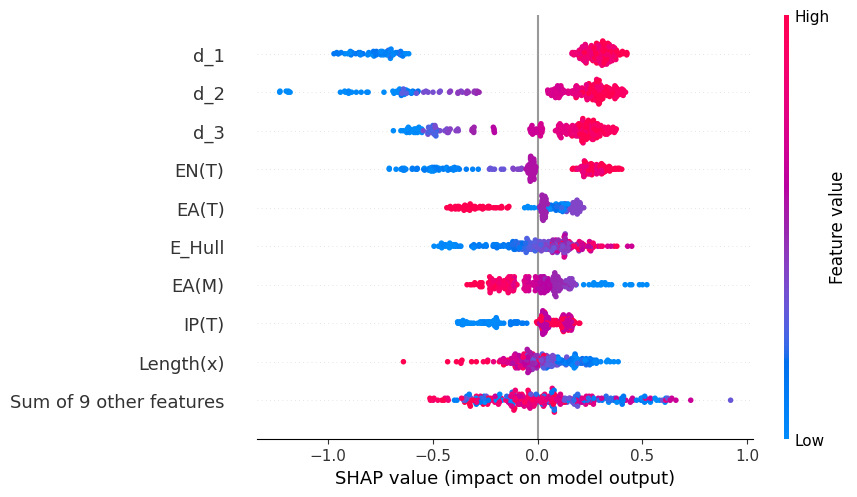

In [53]:
for shap_values in shap_list :
    shap.plots.beeswarm(shap_values)

In [80]:
shap_values_list = []
shap_values_list.append(shap_values_sta[:,'d_2'].values)
shap_values_list.append(shap_values_gb[:,'d_1'].values)
shap_values_list.append(shap_values_et[:,'d_3'].values)
shap_values_list.append(shap_values_knn[:,'d_2'].values)
shap_values_list.append(shap_values_svr[:,'d_2'].values)

In [91]:
data = pd.DataFrame(shap_values_et[:,'d_3'].data)

In [92]:
data

,0
0,-0.003385
1,-0.002186
2,-0.001867
3,-0.001874
4,-0.002107
...,...
270,-0.002186
271,-0.001867
272,-0.003385
273,-0.002186


In [93]:
data.to_excel(r'C:\Users\Shang\Desktop\11111.xlsx')